In [1]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection  import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics

from sklearn.model_selection  import GridSearchCV
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

### 1. 데이터 준비

테이블 데이터 cancer 사용한다. 

데이터는 13개의 변수를 가지고 있으며, 양성과 음성으로 라벨이 구분되어 있다. 

In [2]:
cancer = datasets.load_breast_cancer()

분류기 성능을 평가하기 위해 데이터를 train data와 test data로 분할한다.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109) # 70% training and 30% test

### 2. 실험 진행

✅ **실험은 총 6가지 세팅으로 진행한다** ✅




✔ 1,2,3번 실험 : 원본 데이터에 서로 다른 3가지 kernel 함수를 적용한 모델 3가지 
    
    - pipeline을 사용하여 모델 구성

    - 그리드 서치 cross-validation을 사용하여 최적의 매개변수 조합을 탐색
    
    - 매개변수는 margin hardness를 조절하는 C와 RBF kernel의 사이즈를 조절하는 gamma로 설정



✔ 4,5,6번 실험 : 원본 데이터에 PCA를 적용하여 차원을 축소한 뒤 3가지 kernel 함수를 적용한 모델 3가지
    
    - 시각화를 위해 pipeline 사용하지 않고, PCA와 SVC 따로 진행
    
    - kernel 함수를 적용한 데이터 2차원 plot에 시각화



#### 1. Linear Kernel SVC 사용


In [4]:
svc = SVC(kernel='linear', class_weight='balanced')
model = make_pipeline(svc) 

'''파라미터 튜닝'''
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid) # (학습시킬 모델, 파라미터 후보들)

%time grid.fit(X_train, y_train)
print(grid.best_params_)

'''X_test로 예측'''
model = grid.best_estimator_
y_pred = model.predict(X_test)

'''4가지 지표로 평가'''
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("f1_score:",metrics.f1_score(y_test, y_pred))

CPU times: total: 2min 56s
Wall time: 2min 56s
{'svc__C': 1, 'svc__gamma': 0.0001}
Accuracy: 0.9590643274853801
Precision: 0.9809523809523809
Recall: 0.9537037037037037
f1_score: 0.9671361502347416


#### 2. Polynomial Kernel SVC 사용

In [21]:
svc = SVC(kernel='poly', class_weight='balanced')
model = make_pipeline(svc) 

'''파라미터 튜닝'''
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid) # (학습시킬 모델, 파라미터 후보들)

%time grid.fit(X_train, y_train)
print(grid.best_params_)

'''X_test로 예측'''
model = grid.best_estimator_
y_pred = model.predict(X_test)

'''4가지 지표로 평가'''
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("f1_score:",metrics.f1_score(y_test, y_pred))

CPU times: total: 375 ms
Wall time: 374 ms
{'svc__C': 50, 'svc__gamma': 0.005}
Accuracy: 0.631578947368421
Precision: 0.631578947368421
Recall: 1.0
f1_score: 0.7741935483870968


#### 3. RBF Kernel SVC 사용

In [5]:
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(svc) 

'''파라미터 튜닝'''
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid) # (학습시킬 모델, 파라미터 후보들)

%time grid.fit(X_train, y_train)
print(grid.best_params_)

'''X_test로 예측'''
model = grid.best_estimator_
y_pred = model.predict(X_test)

'''4가지 지표로 평가'''
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("f1_score:",metrics.f1_score(y_test, y_pred))

CPU times: total: 625 ms
Wall time: 618 ms
{'svc__C': 1, 'svc__gamma': 0.0001}
Accuracy: 0.9766081871345029
Precision: 0.9814814814814815
Recall: 0.9814814814814815
f1_score: 0.9814814814814815


#### 4. PCA와 Linear Kernel SVC 사용

In [6]:
# PCA 적용
pca = RandomizedPCA(n_components=2, whiten=True, random_state=42)
principalDf = pd.DataFrame(data=pca.fit_transform(cancer.data), columns = ['PC1', 'PC2'])
principalDf['target'] = cancer.target
X = principalDf.iloc[:,:2].values
y = principalDf.iloc[:,2:].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109) # 70% training and 30% test

In [13]:
# SVC 적용
'''SVC 학습'''
svc = SVC(kernel='linear', class_weight='balanced')
svc.fit(X_train, y_train)

'''X_test로 예측'''
y_pred = svc.predict(X_test)

'''4가지 지표로 평가'''
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("f1_score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.9649122807017544
Precision: 0.9722222222222222
Recall: 0.9722222222222222
f1_score: 0.9722222222222222


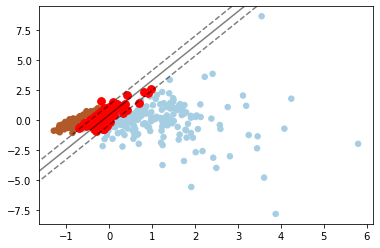

In [14]:
# 시각화
plt.scatter(X[:,0], X[:,1], c=y, s=30, cmap=plt.cm.Paired)
# 초평면(Hyper-Plane) 표현
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svc.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--', '-', '--'])
# 지지벡터(Support Vector) 표현
ax.scatter(svc.support_vectors_[:,0], svc.support_vectors_[:,1], s=60, facecolors='r')
plt.show()

#### 5. PCA와 Polynomial Kernel SVC 사용

In [15]:
# PCA 적용
pca = RandomizedPCA(n_components=2, whiten=True, random_state=42)
principalDf = pd.DataFrame(data=pca.fit_transform(cancer.data), columns = ['PC1', 'PC2'])
principalDf['target'] = cancer.target
X = principalDf.iloc[:,:2].values
y = principalDf.iloc[:,2:].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109) # 70% training and 30% test

In [16]:
# SVC 적용
'''SVC 학습'''
svc = SVC(kernel='poly', class_weight='balanced')
svc.fit(X_train, y_train)

'''X_test로 예측'''
y_pred = svc.predict(X_test)

'''4가지 지표로 평가'''
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("f1_score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.8830409356725146
Precision: 0.84375
Recall: 1.0
f1_score: 0.9152542372881356


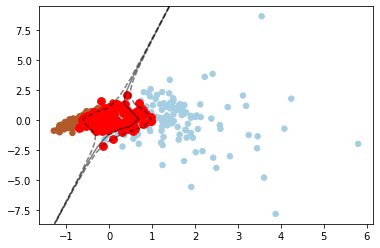

In [17]:
# 시각화
plt.scatter(X[:,0], X[:,1], c=y, s=30, cmap=plt.cm.Paired)
# 초평면(Hyper-Plane) 표현
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svc.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--', '-', '--'])
# 지지벡터(Support Vector) 표현
ax.scatter(svc.support_vectors_[:,0], svc.support_vectors_[:,1], s=60, facecolors='r')
plt.show()

#### 6. PCA와 RBF Kernel SVC 사용

In [18]:
# PCA 적용
pca = RandomizedPCA(n_components=2, whiten=True, random_state=42)
principalDf = pd.DataFrame(data=pca.fit_transform(cancer.data), columns = ['PC1', 'PC2'])
principalDf['target'] = cancer.target
X = principalDf.iloc[:,:2].values
y = principalDf.iloc[:,2:].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109) # 70% training and 30% test

In [19]:
# SVC 적용
'''SVC 학습'''
svc = SVC(kernel='rbf', class_weight='balanced')
svc.fit(X_train, y_train)

'''X_test로 예측'''
y_pred = svc.predict(X_test)

'''4가지 지표로 평가'''
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("f1_score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.9532163742690059
Precision: 0.9545454545454546
Recall: 0.9722222222222222
f1_score: 0.963302752293578


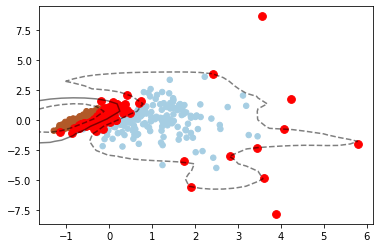

In [20]:
# 시각화
plt.scatter(X[:,0], X[:,1], c=y, s=30, cmap=plt.cm.Paired)
# 초평면(Hyper-Plane) 표현
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svc.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--', '-', '--'])
# 지지벡터(Support Vector) 표현
ax.scatter(svc.support_vectors_[:,0], svc.support_vectors_[:,1], s=60, facecolors='r')
plt.show()

- 시각화 참고자료 

http://www.gisdeveloper.co.kr/?p=8180

- pipeline 참고자료 

https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html#Fitting-a-support-vector-machine